# K-Nearest Neighbors (KNN) Algorithm

K-Nearest Neighbors (KNN) is a simple unsupervised algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). The idea behind KNN is to assume that similar things exist in close proximity. In other words, similar things are near to each other. 

KNN uses the euclidean distance to calculate the distance between the new data point and the existing data points. The euclidean distance is calculated as follows:

$$ \text{Euclidean Distance} = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2} $$

where \(x_i\) and \(y_i\) are the feature values of the data points. This can be expanded to multiple dimensions in a similar way.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
iris_df = sns.load_dataset('iris')
X, y = iris_df[iris_df.columns[:-1]].values, iris_df[iris_df.columns[-1]].values

In [5]:
print(X.shape, y.shape)
print(np.c_[X[:5], y[0:5]])

(150, 4) (150,)
[[5.1 3.5 1.4 0.2 'setosa']
 [4.9 3.0 1.4 0.2 'setosa']
 [4.7 3.2 1.3 0.2 'setosa']
 [4.6 3.1 1.5 0.2 'setosa']
 [5.0 3.6 1.4 0.2 'setosa']]


In [6]:
y = np.where(y == 'setosa', 0, np.where(y == 'versicolor', 1, 2))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [11]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [12]:
def make_df(X, y):
    df = pd.DataFrame(np.concatenate([X, y.reshape(-1, 1)], axis=1), columns=iris_df.columns)
    df[['species']] = np.where(df[['species']] == 0, 'setosa', np.where(df[['species']] == 1, 'versicolor', 'virginica'))
    return df

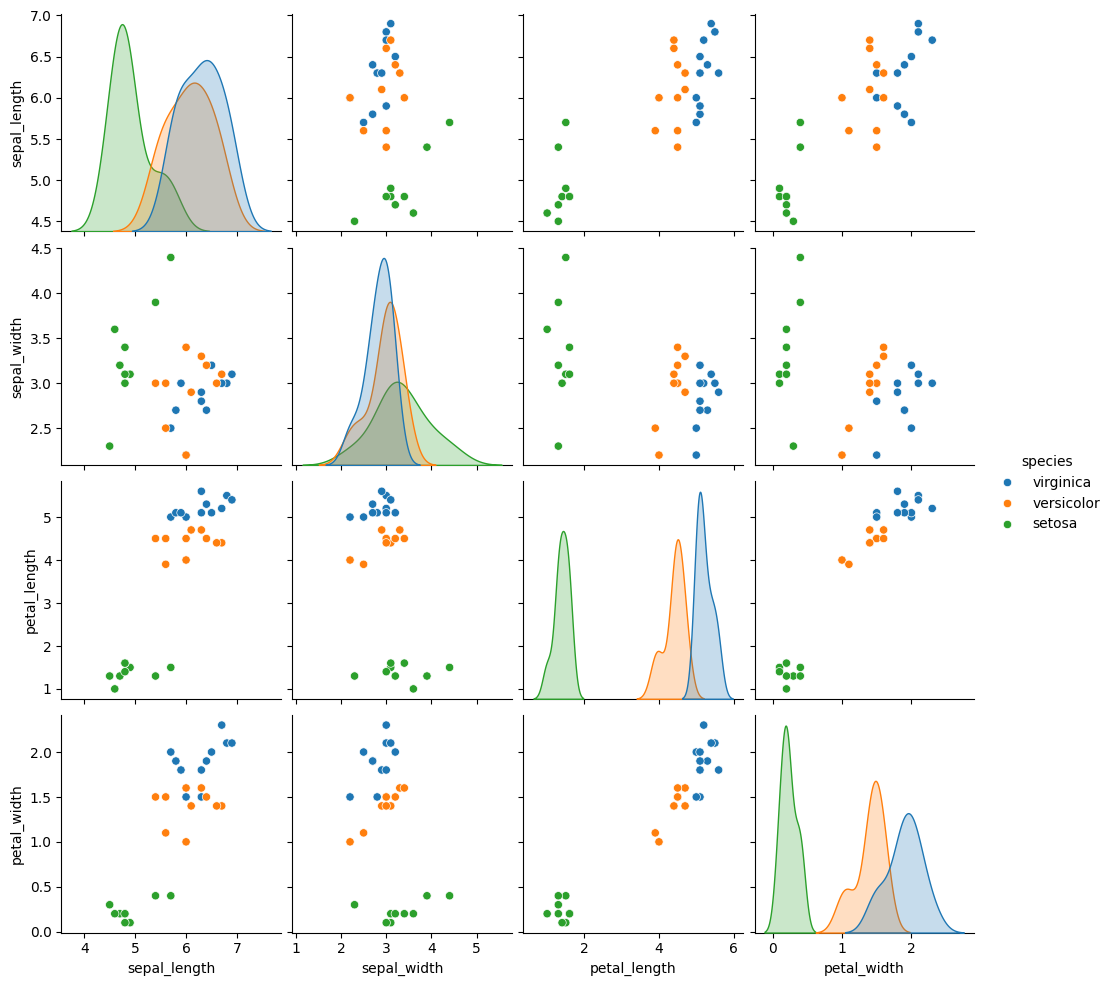

In [13]:
sns.pairplot(make_df(X_test, y_test), hue='species')
plt.show()

# Scikit-Learn Implementation

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [19]:
knn_sk = KNeighborsClassifier(n_neighbors=3)
knn_sk.fit(X_train, y_train)
y_pred_sk = knn_sk.predict(X_test)

print('Accuracy (sklearn):', accuracy_score(y_test, y_pred_sk))

Accuracy (sklearn): 0.9333333333333333


In [20]:
class KNN:

    def __init__(self, k=3) -> None:
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y


    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # compute distances
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # sort by distance
        # argsort returns the indices that would sort an array in ascending order
        # so we get the indices of the k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]
        # find k nearest neighbors labels
        k_nearest_labels = self.y_train[k_indices]
        # majority vote
        # bincount returns the number of occurrences of each value in the array
        # from 0 to the max(list), count of #of values at index same as that value
        # argmax returns the index of the maximum value which is the most common
        # neighbor label hence the prediction
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

In [22]:
knn = KNN(k=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Accuracy (custom):', accuracy_score(y_test, y_pred))

Accuracy (custom): 0.9333333333333333


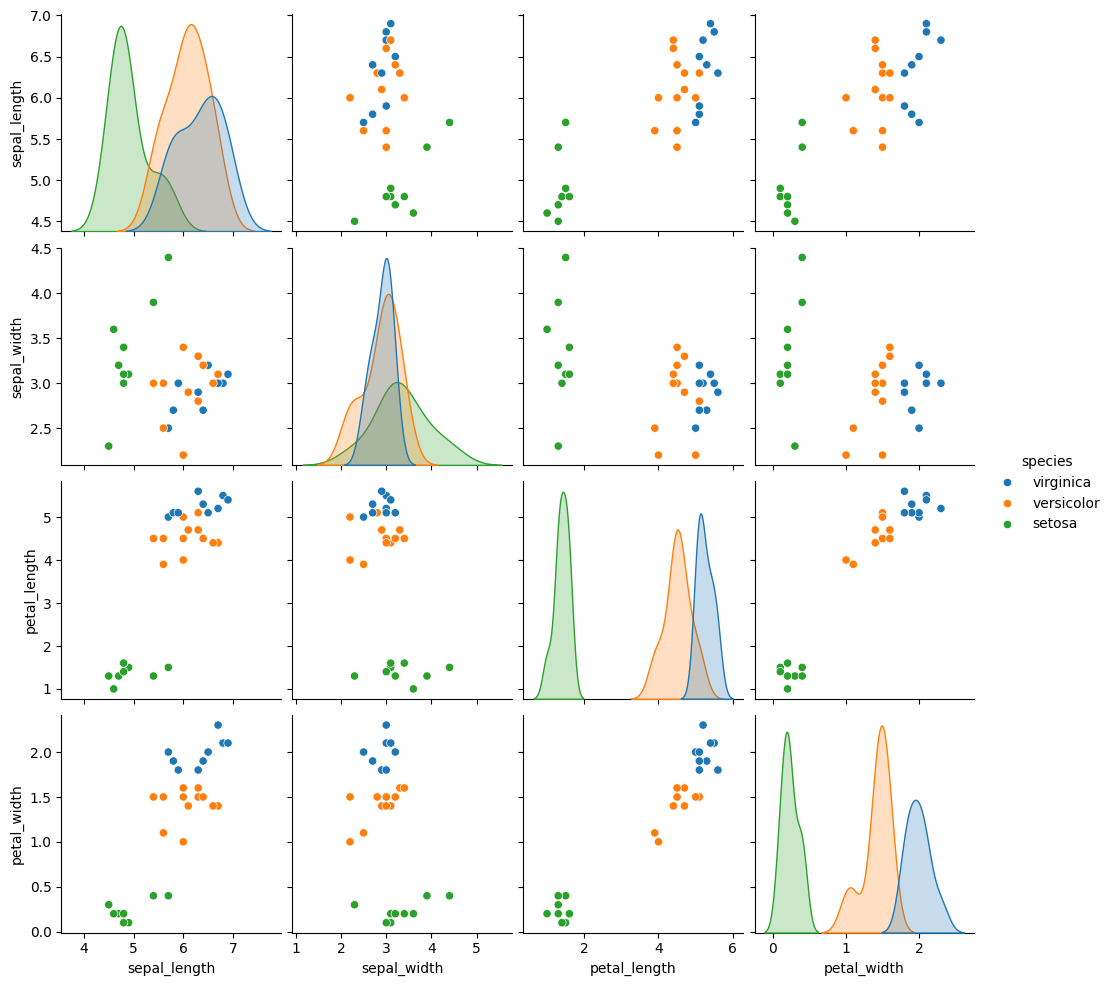

In [23]:
pred_df = make_df(X_test, y_pred)
sns.pairplot(pred_df, hue='species')
plt.show()